### 목표 : 부족한 feature를 조합 생성하여 모델 성능 향상
- 특성공학 : feature 추출 / 선택 / 생성
- 비선형 데이터에 대한 feature 생성: 곡선형태의 회귀선 수식 생성
- 모듈     : sklearn.preprocessing 안에 포함됨
- data     : fish. csv
- feature  : Perch의 height, Length, Width
- target   : Perch의 Width
- 학습 유형: 지도학습


 전처리 feature 조합 생성 살펴보기


In [39]:
# 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# 인스턴스 생성
poly = PolynomialFeatures(include_bias=False)

In [41]:
poly.fit([[2,3]])

PolynomialFeatures(include_bias=False)

In [42]:
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [43]:
poly = PolynomialFeatures(include_bias=False, degree= 5)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [44]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

2. Perch 데이터를 최대한 만족하는 회귀선 찾기


2-1. module loading, data preset

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
#data set
data = '../data/fish.csv'
dataDF = pd.read_csv(data)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [47]:
perch = dataDF[dataDF.Species == 'Perch']

perchDF = dataDF.drop('Diagonal', axis= 'columns').copy()
perchDF = perchDF.drop('Species', axis= 'columns').copy()

In [48]:
perchDF.reset_index(drop=True, inplace=True)

In [91]:
poly = PolynomialFeatures(include_bias=False)

In [92]:
poly.fit(perchDF)

PolynomialFeatures(include_bias=False)

In [93]:
pd.DataFrame(poly.transform(perchDF), columns=poly.get_feature_names_out())

,Weight,Length,Height,Width,Weight^2,Weight Length,Weight Height,Weight Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2
0,242.0,25.4,11.5200,4.0200,58564.00,6146.80,2787.84000,972.84000,645.16,292.60800,102.10800,132.710400,46.310400,16.160400
1,290.0,26.3,12.4800,4.3056,84100.00,7627.00,3619.20000,1248.62400,691.69,328.22400,113.23728,155.750400,53.733888,18.538191
2,340.0,26.5,12.3778,4.6961,115600.00,9010.00,4208.45200,1596.67400,702.25,328.01170,124.44665,153.209933,58.127387,22.053355
3,363.0,29.0,12.7300,4.4555,131769.00,10527.00,4620.99000,1617.34650,841.00,369.17000,129.20950,162.052900,56.718515,19.851480
4,430.0,29.0,12.4440,5.1340,184900.00,12470.00,5350.92000,2207.62000,841.00,360.87600,148.88600,154.853136,63.887496,26.357956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,12.2,2.0904,1.3936,148.84,148.84,25.50288,17.00192,148.84,25.50288,17.00192,4.369772,2.913181,1.942121
155,13.4,12.4,2.4300,1.2690,179.56,166.16,32.56200,17.00460,153.76,30.13200,15.73560,5.904900,3.083670,1.610361
156,12.2,13.0,2.2770,1.2558,148.84,158.60,27.77940,15.32076,169.00,29.60100,16.32540,5.184729,2.859457,1.577034
157,19.7,14.3,2.8728,2.0672,388.09,281.71,56.59416,40.72384,204.49,41.08104,29.56096,8.252980,5.938652,4.273316


2 - 2. data check <hr>

- 학습 유형 결정을 위한 단계
- feature 스케일링 진행 여부 확인

In [50]:
print(f"Weight.max : {perchDF['Weight'].max()}") #1650.0
print(f"Weight.min : {perchDF['Weight'].min()}") # 0.0-> 결측값?
print(f"Weight.mean: {perchDF['Weight'].mean()}") # 398.32

Weight.max : 1650.0
Weight.min : 0.0
Weight.mean: 398.3264150943396


In [51]:
print(f"Length.max : {perchDF['Length'].max()}") #63.4
print(f"Length.min : {perchDF['Length'].min()}") #8.4
print(f"Length.mean: {perchDF['Length'].mean()}") #28.42

Length.max : 63.4
Length.min : 8.4
Length.mean: 28.415723270440253


In [52]:
print(f"Height.max : {perchDF['Height'].max()}") #18.957
print(f"Height.min : {perchDF['Height'].min()}") #1.728
print(f"Height.mean: {perchDF['Height'].mean()}") #8.970

Height.max : 18.957
Height.min : 1.7284
Height.mean: 8.970993710691824


In [53]:
print(f"Width.max : {perchDF['Width'].max()}") #8.142
print(f"Width.min : {perchDF['Width'].min()}") #1.0476
print(f"Width.mean: {perchDF['Width'].mean()}") #4.417

Width.max : 8.142
Width.min : 1.0476
Width.mean: 4.417485534591195


In [54]:
corr = perchDF.corr()
abs(corr['Weight']).sort_values(ascending=False)


Weight    1.000000
Length    0.918618
Width     0.886507
Height    0.724345
Name: Weight, dtype: float64

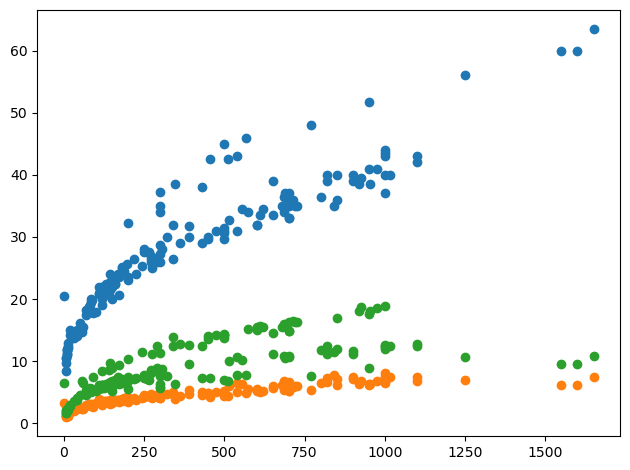

In [55]:
plt.scatter(perchDF.Weight, perchDF.Length)
plt.scatter(perchDF.Weight, perchDF.Width)
plt.scatter(perchDF.Weight, perchDF.Height)
plt.tight_layout()

In [67]:
feature = perchDF[perchDF.columns[1:]]
target = perchDF[perchDF.columns[0]]

feature

,Length,Height,Width
0,25.4,11.5200,4.0200
1,26.3,12.4800,4.3056
2,26.5,12.3778,4.6961
3,29.0,12.7300,4.4555
4,29.0,12.4440,5.1340
...,...,...,...
154,12.2,2.0904,1.3936
155,12.4,2.4300,1.2690
156,13.0,2.2770,1.2558
157,14.3,2.8728,2.0672


In [68]:
#linearRegression
#polynomialRegression

In [73]:
standard = StandardScaler()
mmscaler = MinMaxScaler()
robust = RobustScaler()

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(feature, target)

In [77]:
standard.fit(xtrain, ytrain)
mmscaler.fit(xtrain, ytrain)
robust.fit(xtrain, ytrain)

RobustScaler()

In [80]:
#스케일러 따라 점수 반환하는 어쩌구 함수 만들기
# 1모델 1스케일러!!! 모델 한 개에 스케일러를 여러 개 먹이면 값이 이상해진다
def scores(feature, target):
    xtrain, xtest, ytrain, ytest = train_test_split(feature, target)
    standard_xtrain = standard.transform(xtrain)
    standard_xtest = standard.transform(xtest)

    mmscaled_xtrain = mmscaler.transform(xtrain)
    mmscaled_xtest = mmscaler.transform(xtest)

    robust_xtrain = robust.transform(xtrain)
    robust_xtest = robust.transform(xtest)
    
    # 학습시키기
    md1 = LinearRegression()
    md1.fit(standard_xtrain, ytrain)
    
    md2 = LinearRegression()
    md2.fit(mmscaled_xtrain, ytrain)
    
    md3 = LinearRegression()
    md3.fit(robust_xtrain, ytrain)
    
    # 테스트 진행
    standard_train_score = md1.score(standard_xtrain, ytrain)
    standard_test_score = md1.score(standard_xtest, ytest)
    
    mm_train_score = md2.score(mmscaled_xtrain, ytrain)
    mm_test_score = md2.score(mmscaled_xtest, ytest)
    
    robust_train_score = md3.score(robust_xtrain, ytrain)
    robust_test_score = md3.score(robust_xtest, ytest)
    
    # 각 툴을 사용하여 점수만 출력하기
    print(f'standard : \n trainscore: {standard_train_score}\n testscore: {standard_test_score}\n')
    print(f'minmax : \n trainscore: {mm_train_score}\n testscore: {mm_test_score}\n')
    print(f'robust : \n trainscore: {robust_train_score}\n testscore: {robust_test_score}\n')
    
    #과대적합 비교하여 적절한 모델 도출하기
    accuracy_standard = abs(standard_train_score - standard_test_score)
    accuracy_robust = abs(robust_train_score - robust_test_score)
    accuracy_minmax = abs(mm_train_score - robust_test_score)
    total = {'minmax':accuracy_minmax, 'robust':accuracy_robust, 'standard':accuracy_standard} 
    
    total.keys() #key 나열
    total. values() # value 나열
    
    print(f'{min(total), min(total.values())}')

In [81]:
scores(feature, target)

standard : 
 trainscore: 0.880961452808936
 testscore: 0.8696364688054896

minmax : 
 trainscore: 0.880961452808936
 testscore: 0.8696364688054896

robust : 
 trainscore: 0.880961452808936
 testscore: 0.8696364688054895

('minmax', 0.011324984003446392)


In [82]:
perchDF.corr(numeric_only=True)

,Weight,Length,Height,Width
Weight,1.000000,0.918618,0.724345,0.886507
Length,0.918618,1.000000,0.640441,0.873547
Height,0.724345,0.640441,1.000000,0.792881
Width,0.886507,0.873547,0.792881,1.000000


In [84]:
md = LinearRegression()
md

LinearRegression()

In [85]:
md.fit(feature, target)

LinearRegression()

In [86]:
md.score(feature, target)

0.881546129383464